## **Capstone Project**
#### **Developer**: Tai Sewell
#### **Description**: Welcome to my Capstone Project, my project is a machine learning model that I built that uses the data of the top 1500 games on steam in 2024. This model is a regression model that takes this data and uses it to predict the prices & revenue of games.
#### **Goal**: Predict game prices & Revenue


## **Mount The Drive**:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Import Required System Files**:

In [2]:
# EDA Imports
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
import seaborn as sns

# Processing Data Imports
from sklearn.preprocessing import OneHotEncoder

# Testing & Training Set Imports
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Ensemble Regression Model Imports
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor

# Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Model Evaluation Imports
from sklearn.metrics import mean_squared_error, r2_score

## **Load & Read The Data File**:

In [3]:
# Load & Read the dataset
gameData = pd.read_csv('/content/drive/MyDrive/Colab_Data/Steam_2024_bestRevenue_1500.csv')

## **EDA (Exploratory Data Analysis)**:

#### General Analysis:

In [ ]:
# Display dataset information
gameData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1500 non-null   object 
 1   releaseDate     1500 non-null   object 
 2   copiesSold      1500 non-null   int64  
 3   price           1500 non-null   float64
 4   revenue         1500 non-null   float64
 5   avgPlaytime     1500 non-null   float64
 6   reviewScore     1500 non-null   int64  
 7   publisherClass  1500 non-null   object 
 8   publishers      1499 non-null   object 
 9   developers      1498 non-null   object 
 10  steamId         1500 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 129.0+ KB


In [ ]:
# Get columns in gameData
gameData.columns

Index(['name', 'releaseDate', 'copiesSold', 'price', 'revenue', 'avgPlaytime',
       'reviewScore', 'publisherClass', 'publishers', 'developers', 'steamId'],
      dtype='object')

In [ ]:
# Check the top 5 elements of the dataset
gameData.head()

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
0,WWE 2K24,07-03-2024,165301,99.99,8055097.0,42.365140,71,AAA,2K,Visual Concepts,2315690
1,EARTH DEFENSE FORCE 6,25-07-2024,159806,59.99,7882151.0,29.651061,57,Indie,D3PUBLISHER,SANDLOT,2291060
2,Sins of a Solar Empire II,15-08-2024,214192,49.99,7815247.0,12.452593,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",1575940
3,Legend of Mortal,14-06-2024,440998,19.99,7756399.0,24.797817,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.,1859910
4,Shin Megami Tensei V: Vengeance,13-06-2024,141306,59.99,7629252.0,34.258496,96,AA,SEGA,ATLUS,1875830


In [ ]:
# Check the bottom 5 elements of the dataset
gameData.tail()

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
1495,Infection Free Zone,11-04-2024,452146,24.99,8739530.0,14.494432,73,Indie,Games Operators,Jutsu Games,1465460
1496,Dark and Darker,07-06-2024,2640903,0.00,8706135.0,31.974027,74,Indie,IRONMACE,IRONMACE,2016590
1497,Songs of Conquest,20-05-2024,501474,34.99,8641459.0,11.891152,88,AA,Coffee Stain Publishing,Lavapotion,867210
1498,GUNDAM BREAKER 4,28-08-2024,156339,59.99,8440898.0,14.733899,81,AA,Bandai Namco Entertainment Inc.,"CRAFTS ＆ MEISTER Co., Ltd",1672500
1499,Peglin,27-08-2024,544144,19.99,8125042.0,30.160995,82,Indie,"Red Nexus Games Inc.,IndieArk",Red Nexus Games Inc.,1296610


#### Visualizing Data:

In [ ]:
# Get the Max & Min revenues for gameData's top 25 games
max_revenue = gameData['revenue'].head(25).max()
min_revenue = gameData['revenue'].head(25).min()

print("Maximum Revenue:", max_revenue)
print("Minimum Revenue:", min_revenue)

Maximum Revenue: 8055097.0
Minimum Revenue: 4644684.0


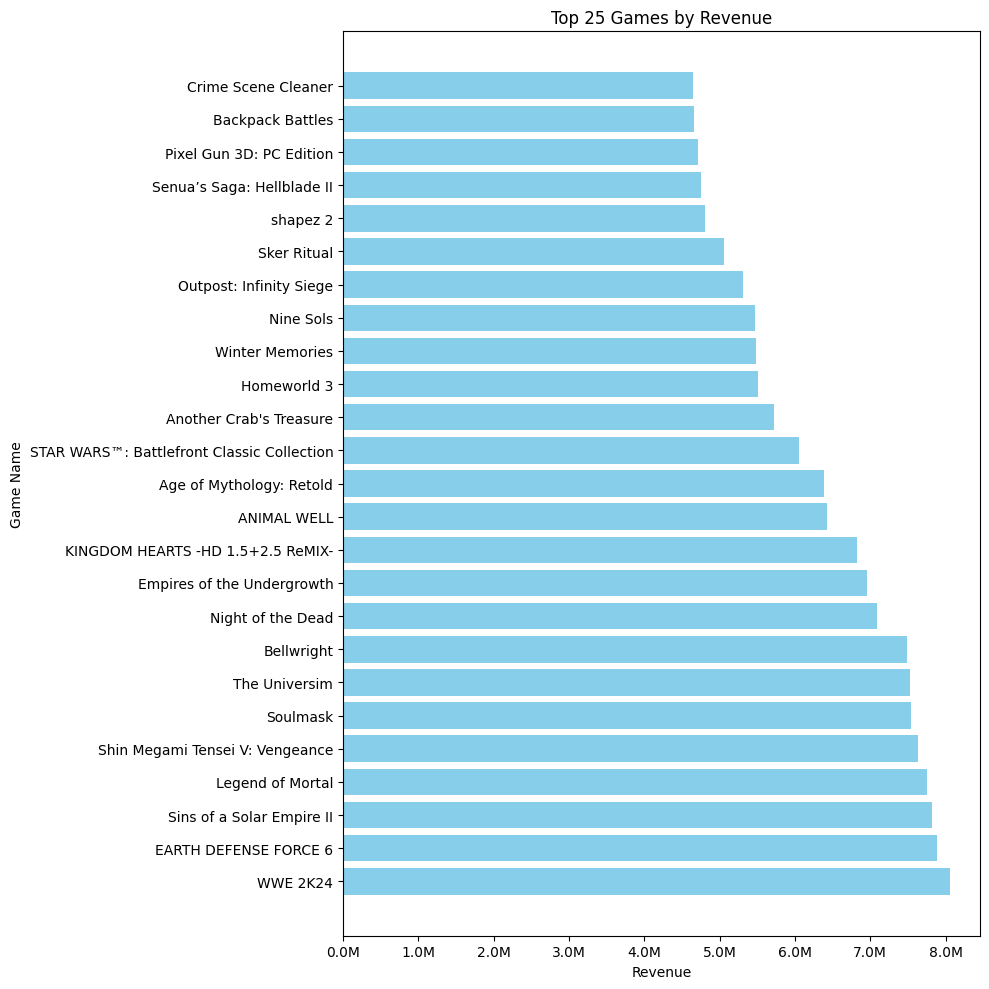

In [ ]:
# Graph the correlation between the top 25 games (Game Name & Revenue)
plt.figure(figsize=(10, 10))
plt.barh(gameData['name'].head(25), gameData['revenue'].head(25), color='skyblue')  # Horizontal bar plot
plt.xlabel('Revenue')
plt.ylabel('Game Name')
plt.title('Top 25 Games by Revenue')

# Format x-axis to show values in millions (e.g., 5M)
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x*1e-6:.1f}M'))

plt.tight_layout()
plt.show()

## **Process The Data**:

#### Handle Missing Values:

In [ ]:
# Create a copy of the main dataset
gameData_copy = gameData.copy()

# Check for missing data in dataset
gameData_copy.isnull().sum()

,0
name,0
releaseDate,0
copiesSold,0
price,0
revenue,0
avgPlaytime,0
reviewScore,0
publisherClass,0
publishers,1
developers,2


In [ ]:
# Get rid of columns with missing values because they are not necessary columns
gameData_copy = gameData_copy.drop(['publishers', 'developers'], axis=1)

# Show columns for gameData_copy
gameData_copy.info()

# Check for missing data
gameData_copy.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1500 non-null   object 
 1   releaseDate     1500 non-null   object 
 2   copiesSold      1500 non-null   int64  
 3   price           1500 non-null   float64
 4   revenue         1500 non-null   float64
 5   avgPlaytime     1500 non-null   float64
 6   reviewScore     1500 non-null   int64  
 7   publisherClass  1500 non-null   object 
 8   steamId         1500 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 105.6+ KB


,0
name,0
releaseDate,0
copiesSold,0
price,0
revenue,0
avgPlaytime,0
reviewScore,0
publisherClass,0
steamId,0


#### Encode The Data:

In [ ]:
# Identify categorical columns to encode
categorical_columns = ['name', 'releaseDate', 'publisherClass']

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(gameData_copy[categorical_columns])

# Get the encoded feature names
encoded_feature_names = encoder.get_feature_names_out(categorical_columns)

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoded_feature_names)

# Reset index of original DataFrame to ensure proper concatenation
gameData_copy = gameData_copy.reset_index(drop=True)

# Concatenate the encoded columns with the original DataFrame
# First, drop the original categorical columns
df_numeric = gameData_copy.drop(columns=categorical_columns)

# Then concatenate with the encoded columns
df_encoded = pd.concat([df_numeric, encoded_df], axis=1)

# Now df_encoded contains all your original data with categorical variables properly encoded
print(f"Original DataFrame shape: {gameData_copy.shape}")
print(f"Encoded DataFrame shape: {df_encoded.shape}")
print(f"New columns added through encoding: {df_encoded.shape[1] - gameData_copy.shape[1]}")

Original DataFrame shape: (1500, 9)
Encoded DataFrame shape: (1500, 1745)
New columns added through encoding: 1736


## **Visualize The Data**:

#### Correlation Matrix:

<Axes: >

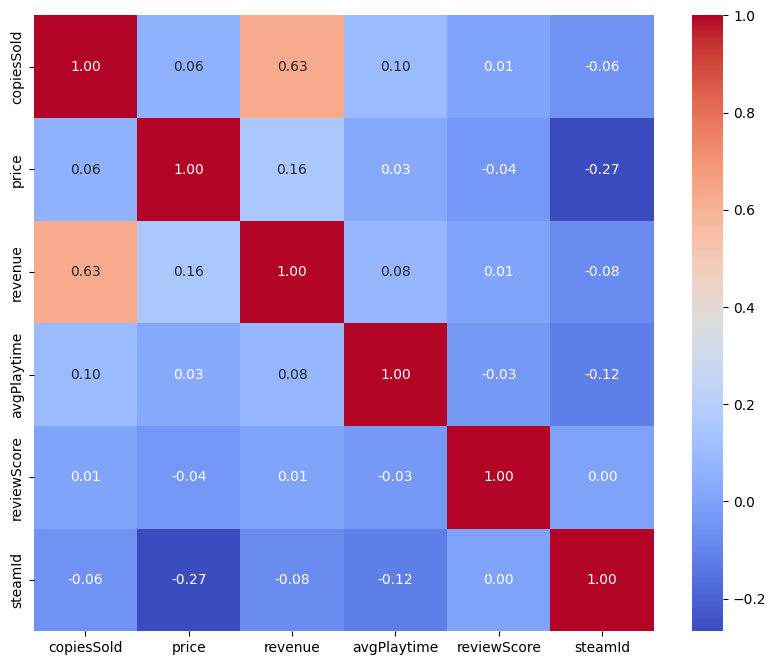

In [ ]:
# Create a correlation matrix
correlation_matrix = df_numeric.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

#### **Interpretation Of Correlation Matrix**
##### Relevant Correlations Made:
##### - copiesSold & revenue = Pretty strong correlation
##### - Price & Revenue = Little to no correlation
##### - reviewScore & Revenue = Almost no correlation

#### Graphs:

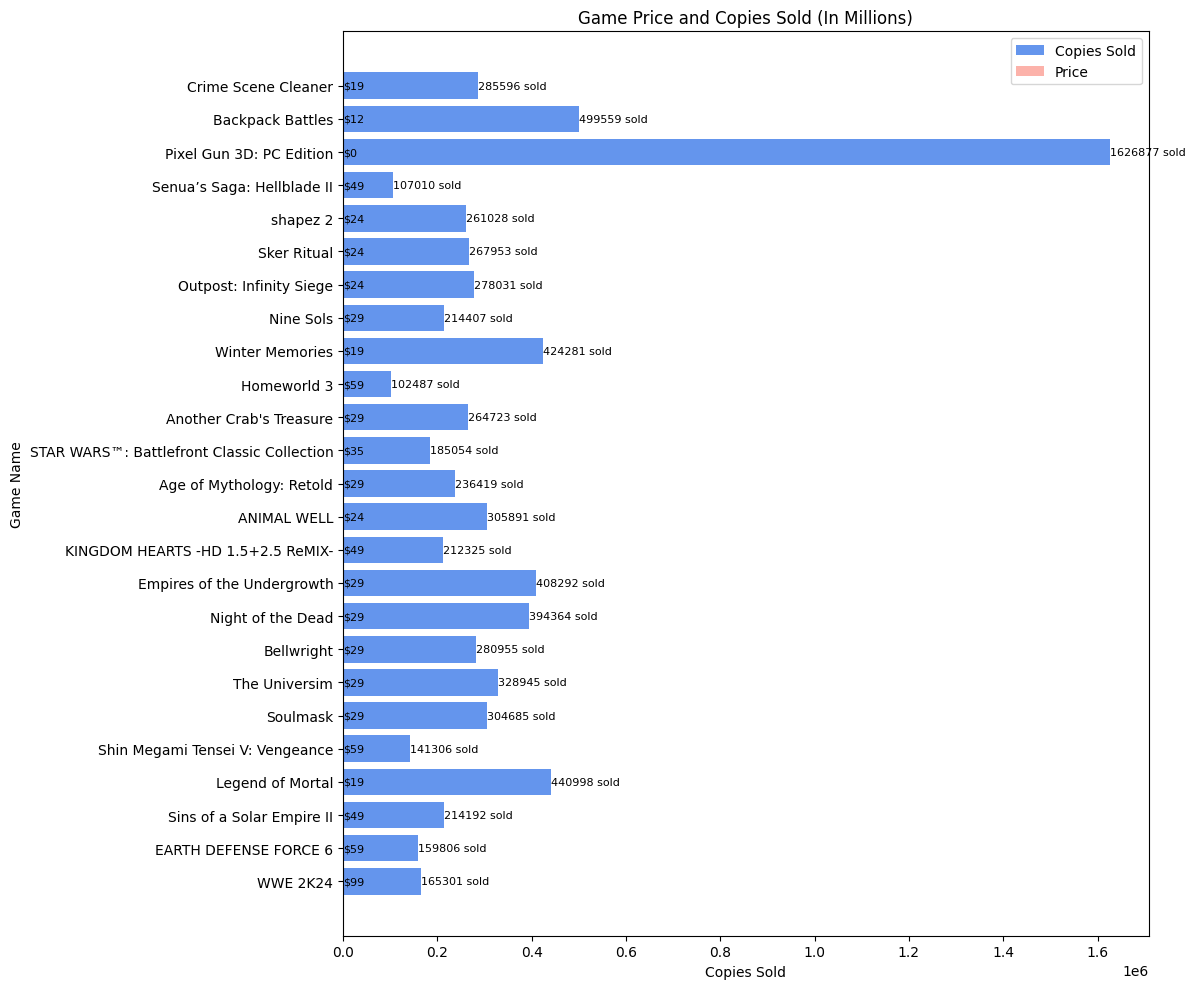

In [ ]:
# Visualize the processed data
# Limit dataset to show relationship between game price and copies sold
data = gameData_copy.head(25).copy()

# Create a combined label column
data['label'] = data['copiesSold'].astype(int).astype(str) + ' copies sold - $' + data['price'].astype(float).astype(int).astype(str) + ' price'

# Plot
plt.figure(figsize=(12, 10))
plt.barh(data['name'], data['copiesSold'], color='cornflowerblue', label='Copies Sold')
plt.barh(data['name'], data['price'], color='salmon', alpha=0.6, label='Price')

# Use combined labels as annotations
for index, row in data.iterrows():
    plt.text(row['copiesSold'] + 1, row['name'], f"{int(row['copiesSold'])} sold", va='center', color='black', fontsize=8)
    plt.text(row['price'] + 1, row['name'], f"${int(row['price'])}", va='center', color='black', fontsize=8)

# Aesthetics
plt.xlabel('Copies Sold')
plt.ylabel('Game Name')
plt.title('Game Price and Copies Sold (In Millions)')
plt.legend()
plt.tight_layout()
plt.show()

## **Models For Price Predictions**:

### **Split Dataset & Scale The Features (Price Predictions)**:

In [ ]:
# Create new df x with column 'pick' removed
x = gameData_copy.drop(columns=['price'])
# Create new df y with only the 'pick' column
y = gameData_copy['price']

# Train/Test split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the OneHotEncoder with handle_unknown='ignore'
encoder = OneHotEncoder(handle_unknown='ignore')  # Use sparse=False to get a dense matrix

# Create a column transformer to apply the encoder to all object columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, x_train.select_dtypes(include=['object']).columns)
    ],
    remainder='passthrough'  # Keep other columns (non-object) as they are
)

# Fit the encoder and transform the training data
x_train_encoded = preprocessor.fit_transform(x_train)

# Transform the test data using the already fitted encoder
x_test_encoded = preprocessor.transform(x_test)

# Now you can scale the data (ensure it is numerical)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean= False)

# Fit and transform on the training set
x_train_scaled = scaler.fit_transform(x_train_encoded)

# Transform the test set (using the same scaler fitted on training data)
x_test_scaled = scaler.transform(x_test_encoded)

### **Ensemble Regression Model**:

#### Define Base Models:

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

base_models = {
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'XGBoost': xgb_model
}

#### Define Meta Model & Stacking Ensemble:

In [ ]:
# Define Meta Model
meta_model = LinearRegression()

# Create Stacking Model
stacking_model = StackingRegressor(estimators=[('rf', rf_model), ('gb', gb_model), ('xgb', xgb_model)],
                                   final_estimator=meta_model)

# Fit the stacking model to the training data
stacking_model.fit(x_train_scaled, y_train)

StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                              ('gb',
                               GradientBoostingRegressor(random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_type...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                  final_estimator=LinearRegression())

#### Make Predictions:

In [ ]:
# Make predictions on the test data
y_pred = stacking_model.predict(x_test_scaled)

### **Decision Tree Regression Model(DTR)**:

#### Define Model:

In [ ]:
dtrModel = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

#### Implement GridSearch:

In [ ]:
# GridSearch
grid_search = GridSearchCV(estimator=dtrModel,
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='neg_mean_squared_error',
                           n_jobs=-1,  # Use all processors
                           verbose=2)

#### Fit Model:

In [ ]:
# Fit Model
grid_search.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
106 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=2)

#### Make Predictions:

In [ ]:
# Make Predictions
best_model = grid_search.best_estimator_
dtr_y_pred = best_model.predict(x_test_scaled)

### **Evaluate Models**:

#### Evaluate Ensemble Regression Model:

In [ ]:
# Calculate R² Score
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the results
print(f'R² Score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')

R² Score: 0.7929
Mean Squared Error: 37.5521
Root Mean Squared Error: 6.1280


In [ ]:
# Reset index to align rows for comparison
results_df = pd.DataFrame({
    'Actual Price': y_test.reset_index(drop=True),
    'Predicted Price': pd.Series(y_pred)
})

results_df['Predicted Price'] = results_df['Predicted Price'].round(2)
results_df['Actual Price'] = results_df['Actual Price'].round(2)

# Display first few rows
print(results_df.head(10))

   Actual Price  Predicted Price
0         49.99            32.23
1          9.99             9.01
2         17.99            19.95
3         24.99            25.71
4         19.99            18.27
5          9.99             9.31
6         15.99            16.81
7          5.99             5.77
8         24.99            29.12
9         29.99            17.12


#### Evaluate Descision Tree Regression Model:

In [ ]:
print("Best parameters found: ", grid_search.best_params_)

dtr_r2 = r2_score(y_test, dtr_y_pred)
dtr_mse = mean_squared_error(y_test, dtr_y_pred)
dtr_rmse = np.sqrt(mse)

# Print the results
print(f'R² Score: {dtr_r2:.4f}')
print(f'Mean Squared Error: {dtr_mse:.4f}')
print(f'Root Mean Squared Error: {dtr_rmse:.4f}')

Best parameters found:  {'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
R² Score: 0.6708
Mean Squared Error: 59.6901
Root Mean Squared Error: 6.1280


In [ ]:
# Reset index to align rows for comparison
results_df = pd.DataFrame({
    'Actual Price': y_test.reset_index(drop=True),
    'Predicted Price': pd.Series(dtr_y_pred)
})

results_df['Predicted Price'] = results_df['Predicted Price'].round(2)
results_df['Actual Price'] = results_df['Actual Price'].round(2)

# Display first few rows
print(results_df.head(10))

   Actual Price  Predicted Price
0         49.99            32.99
1          9.99             5.53
2         17.99            19.99
3         24.99            22.36
4         19.99            16.49
5          9.99            10.79
6         15.99            16.74
7          5.99             7.49
8         24.99            23.32
9         29.99            19.11


## **Summaries On Models For Price Predictions**:

### **Ensemble Regression Model Performance**
#### R² Score: The ensemble regression model achieved an R² score of 79%, indicating that it was able to explain a significant portion of the variance in the data. This suggests the model's predictions were generally close to the actual values and that it provided a strong fit for the dataset.

#### Mean Squared Error (MSE): The MSE for this model was 37.55. While this isn't a perfect fit, it represents a reasonable level of error given the nature of the data. Additionally, this model outperformed the Decision Tree Regressor, making it the better option of the two.
## -----------------------------------------------------------------------------
### **Decision Tree Regression Model Performance**
#### R² Score: The Decision Tree Regressor achieved an R² score of 67%, meaning it was able to capture a fair amount of the variance in the data. While not as strong as the ensemble model, it still made relatively decent predictions.

#### Mean Squared Error (MSE): With an MSE of 59.69, the model had more significant errors in its predictions. This higher error value reflects less accuracy in estimating the actual prices, especially when compared to the ensemble model.

## **Models For Revenue Predictions**:

### **Split The Testing Data & Feature Selection**:

In [ ]:
# Create new df x with column 'pick' removed
x = gameData_copy.drop(columns=['revenue'])
# Create new df y with only the 'pick' column
y = gameData_copy['revenue']

# Train/Test split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the OneHotEncoder with handle_unknown='ignore'
encoder = OneHotEncoder(handle_unknown='ignore')  # Use sparse=False to get a dense matrix

# Create a column transformer to apply the encoder to all object columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, x_train.select_dtypes(include=['object']).columns)
    ],
    remainder='passthrough'  # Keep other columns (non-object) as they are
)

# Fit the encoder and transform the training data
x_train_encoded = preprocessor.fit_transform(x_train)

# Transform the test data using the already fitted encoder
x_test_encoded = preprocessor.transform(x_test)

# Now you can scale the data (ensure it is numerical)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean= False)

# Fit and transform on the training set
x_train_scaled = scaler.fit_transform(x_train_encoded)

# Transform the test set (using the same scaler fitted on training data)
x_test_scaled = scaler.transform(x_test_encoded)

### **Ensemble Regression Model**:

#### Define Base Models:

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

base_models = {
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'XGBoost': xgb_model
}

#### Define Meta Model And Stacking Structure:

In [ ]:
# Define Meta Model
meta_model = LinearRegression()

# Create Stacking Model
stacking_model = StackingRegressor(estimators=[('rf', rf_model), ('gb', gb_model), ('xgb', xgb_model)],
                                   final_estimator=meta_model)

# Fit the stacking model to the training data
stacking_model.fit(x_train_scaled, y_train)

StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                              ('gb',
                               GradientBoostingRegressor(random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_type...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                  final_estimator=LinearRegression())

### Make Predictions:

In [ ]:
# Make predictions on the test data
y_pred = stacking_model.predict(x_test_scaled)

### **Decision Tree Regression Model(DTR)**:

#### Define Model:

In [ ]:
dtrModel = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

#### Implement GridSearch:

In [ ]:
# GridSearch
grid_search = GridSearchCV(estimator=dtrModel,
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='neg_mean_squared_error',
                           n_jobs=-1,  # Use all processors
                           verbose=2)

#### Fit Model:

In [ ]:
# Fit Model
grid_search.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
111 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=2)

#### Make Predictions:

In [ ]:
# Make Predictions
best_model = grid_search.best_estimator_
dtrr_y_pred = best_model.predict(x_test_scaled)

### **Evaluate Models On Revenue Predictions**:

#### Evaluate Ensemble Regression Model:

In [ ]:
# Calculate R² Score
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the results
print(f'R² Score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')

R² Score: 0.9277
Mean Squared Error: 37438839967809.3047
Root Mean Squared Error: 6118728.6235


In [ ]:
# Reset index to align rows for comparison
results_df = pd.DataFrame({
    'Actual Price': y_test.reset_index(drop=True),
    'Predicted Price': pd.Series(y_pred)
})

results_df['Predicted Price'] = results_df['Predicted Price'].round(2)
results_df['Actual Price'] = results_df['Actual Price'].round(2)

# Display first few rows
print(results_df.head(10))

   Actual Price  Predicted Price
0     1640362.0       3641500.97
1      357315.0        835687.53
2       76619.0        496233.07
3       78067.0        468538.53
4       71874.0        480379.58
5       34177.0        380001.55
6       22099.0        347254.58
7       43768.0        409443.46
8      632941.0       1549591.67
9      122358.0        409885.24


#### Evaluate Decision Tree Regression Model:

In [ ]:
print("Best parameters found: ", grid_search.best_params_)

dtrr_r2 = r2_score(y_test, dtrr_y_pred)
dtrr_mse = mean_squared_error(y_test, dtrr_y_pred)
dtrr_rmse = np.sqrt(mse)

# Print the results
print(f'R² Score: {dtrr_r2:.4f}')
print(f'Mean Squared Error: {dtrr_mse:.4f}')
print(f'Root Mean Squared Error: {dtrr_rmse:.4f}')

Best parameters found:  {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5}
R² Score: 0.7222
Mean Squared Error: 143911104721020.0938
Root Mean Squared Error: 6118728.6235


In [ ]:
    results_df = pd.DataFrame({
        f'Actual Revenue': pd.Series(y_test).reset_index(drop=True),
        f'Predicted Revenue': pd.Series(dtrr_y_pred).reset_index(drop=True)
    })

    results_df['Predicted Revenue'] = results_df['Predicted Revenue'].round(2)
    results_df['Actual Revenue'] = results_df['Actual Revenue'].round(2)

    print(results_df.head(10))

   Actual Revenue  Predicted Revenue
0       1640362.0          443671.00
1        357315.0           65952.50
2         76619.0          203722.00
3         78067.0           83155.50
4         71874.0         1379335.75
5         34177.0           31889.00
6         22099.0          172019.50
7         43768.0        21375635.00
8        632941.0          126705.67
9        122358.0          341391.50


## **Summaries On Models For Revenue Predictions**:

### **Ensemble Regression Model Performance**
#### For this model, I developed and evaluated an ensemble regression model to predict video game revenue. The target variable, revenue, ranged from $0 to several million dollars, making it a challenging task due to its wide distribution and potential outliers.

#### The final ensemble model achieved an R² score of 0.92, indicating that it was able to explain 92% of the variance in the revenue data. This high R² suggests that the model captures the key patterns and relationships in the dataset very effectively.

#### However, the Mean Squared Error (MSE) of the model was 37,438,839,967,809.30 — a large value that reflects the scale of the revenue figures being predicted. While the R² score confirms strong predictive power, the high MSE highlights that the model may still make significant errors when predicting very high-revenue games, possibly due to outliers or the extreme skew in the revenue distribution.

#### In conclusion, the ensemble regression model performs well in capturing overall trends and patterns in the data, especially when evaluated with R². Future improvements could involve applying logarithmic transformation to the revenue, fine-tuning for extreme cases, or incorporating more robust error metrics.
## -----------------------------------------------------------------------------
### **Decision Tree Regression Model Performance**
#### The Decision Tree Regressor was trained to predict video game revenue, which spans a wide range from $0 to several million dollars. Upon evaluation, the model achieved an R² score of 0.7222, meaning it was able to explain approximately 72% of the variance in the target revenue data. This indicates a moderate fit, where the model captures general trends but may struggle with more complex or subtle patterns in the data.

#### The model's Mean Squared Error (MSE) was 143,911,104,721,020.09, a high value that reflects substantial prediction errors, especially on high-revenue games. Given the scale of revenue figures, this MSE suggests that the model has difficulty accurately predicting extreme values and may be overfitting to certain parts of the data while underfitting others.

#### Overall, while the Decision Tree model shows a reasonable ability to model the data, its performance is significantly outpaced by the ensemble model.